# Tiny ImageNet Classifier

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from nimrod.image.datasets import ImageDataset, ImageDataModule
from nimrod.models.core import lr_finder, train_one_cycle
from hydra.utils import instantiate
from omegaconf import OmegaConf
from rich import print

Seed set to 42
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


## Data

In [3]:
project_name = 'Tiny-ImageNet-Classifier'

In [ ]:
dm = ImageDataModule(
    "slegroux/tiny-imagenet-200-clean",
    data_dir = "../data/image",
    batch_size = 512
)

dm.prepare_data()
dm.setup()

print(f"""
    num_classes: {dm.num_classes}
    labels: {dm.label_names}
    img shape: {dm.train_ds[0][0].shape}
    img dim: {dm.dim}
"""
            
    )

[15:24:37] INFO - Init ImageDataModule for slegroux/tiny-imagenet-200-clean


[15:24:39] INFO - loading dataset slegroux/tiny-imagenet-200-clean with args () from split train
[15:24:39] INFO - loading dataset slegroux/tiny-imagenet-200-clean from split train
Overwrite dataset info from restored data version if exists.
[15:24:41] INFO - Overwrite dataset info from restored data version if exists.
Loading Dataset info from ../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2
[15:24:41] INFO - Loading Dataset info from ../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2
Found cached dataset tiny-imagenet-200-clean (/user/s/slegroux/Projects/nimrod/tutorials/../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2)
[15:24:41] INFO - Found cached dataset tiny-imagenet-200-clean (/user/s/slegroux/Projects/nimrod/tutorials/../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d

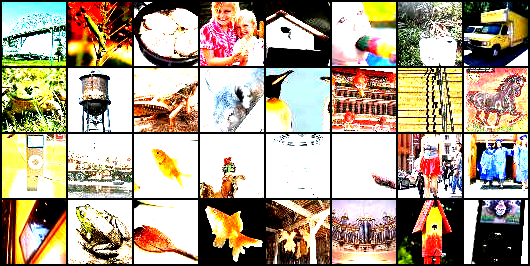

In [6]:
xb, yb = next(iter(dm.train_dataloader()))
dm.show_batch(xb[:32])

## ConvNet

In [ ]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True
exp_logger = 'wandb'

cfg_model = OmegaConf.load('../config/model/image/convnetx.yaml')
# feats_dim = [1, 8, 16, 32, 16]
# feats_dim = [1, 4, 8, 16, 8]
# feats_dim = [1, 8, 16, 32, 64, 128]
# feats_dim = [3, 8, 16, 32, 64, 128, 64]
feats_dim = [3, 16, 32, 64, 128, 256, 128]
cfg_model.nnet.n_features = feats_dim
cfg_model.num_classes = dm.num_classes
model = instantiate(cfg_model) #partial

tags = [
    f"n_features:{feats_dim}",
    f"bs:{dm.batch_size}",
    f"epochs:{N_EPOCHS}",
    ]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags,
    logger_cb=exp_logger
    )

Seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[15:25:26] INFO - ConvNetX: init
[15:25:26] INFO - Classifier: init
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.s

ReadTimeout: (ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 59fe5f73-717b-4124-ac1a-cba870e40c35)')

## ResNet

Seed set to 42


[15:26:13] INFO - ResNet: init
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[15:26:13] INFO - ResNetX: init
[15:26:13] INFO - Classifier: init
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
[15:26:14] INFO - loading dataset slegroux/tiny-imagenet-200-clean with args () from split train
[15:26:14] INFO - loading dataset slegroux/tiny-imagenet-200-clean from split train
Overwrite dataset info from restored data version if exists.
[15:26:16] INFO - Overwrite dataset inf

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 58 steps due to diverging loss.
Learning rate set to 0.001778279410038923
Restoring states from the checkpoint path at /user/s/slegroux/Projects/nimrod/tutorials/.lr_find_5898f1d5-5db0-416b-be04-fef1a49d8c6c.ckpt
Restored all states from the checkpoint at /user/s/slegroux/Projects/nimrod/tutorials/.lr_find_5898f1d5-5db0-416b-be04-fef1a49d8c6c.ckpt


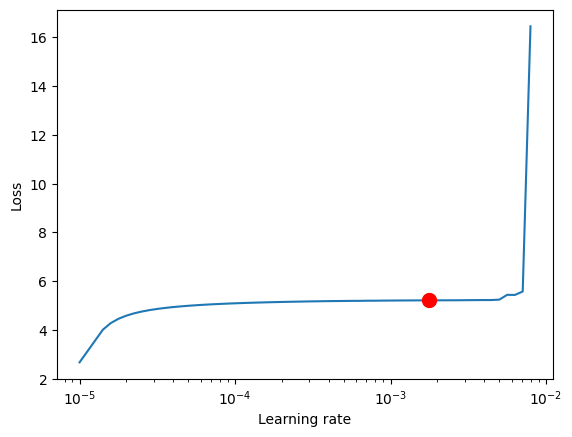

Suggested learning rate: 0.001778279410038923

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[15:26:33] INFO - ResNetX: init
[15:26:33] INFO - Classifier: init


====================================================================================================
Layer (type:depth-idx)                             Output Shape              Param #
====================================================================================================
ResNet                                             [512, 200]                --
├─Sequential: 1-1                                  [512, 200]                --
│    └─ResBlock: 2-1                               [512, 16, 64, 64]         --
│    │    └─Sequential: 3-1                        [512, 16, 64, 64]         2,736
│    │    └─Identity: 3-2                          [512, 3, 64, 64]          --
│    │    └─ConvLayer: 3-3                         [512, 16, 64, 64]         48
│    │    └─LeakyReLU: 3-4                         [512, 16, 64, 64]         --
│    └─ResBlock: 2-2                               [512, 32, 32, 32]         --
│    │    └─Sequential: 3-5                        [512, 32, 32, 32]         13,824
│    │    └─AvgPool2d: 3-6                         [512, 16, 32, 32]         --
│    │    └─ConvLayer: 3-7                         [512, 32, 32, 32]         512
│    │    └─LeakyReLU: 3-8                         [512, 32, 32, 32]         --
│    └─ResBlock: 2-3                               [512, 64, 16, 16]         --
│    │    └─Sequential: 3-9                        [512, 64, 16, 16]         55,296
│    │    └─AvgPool2d: 3-10                        [512, 32, 16, 16]         --
│    │    └─ConvLayer: 3-11                        [512, 64, 16, 16]         2,048
│    │    └─LeakyReLU: 3-12                        [512, 64, 16, 16]         --
│    └─ResBlock: 2-4                               [512, 128, 8, 8]          --
│    │    └─Sequential: 3-13                       [512, 128, 8, 8]          221,184
│    │    └─AvgPool2d: 3-14                        [512, 64, 8, 8]           --
│    │    └─ConvLayer: 3-15                        [512, 128, 8, 8]          8,192
│    │    └─LeakyReLU: 3-16                        [512, 128, 8, 8]          --
│    └─ResBlock: 2-5                               [512, 256, 4, 4]          --
│    │    └─Sequential: 3-17                       [512, 256, 4, 4]          884,736
│    │    └─AvgPool2d: 3-18                        [512, 128, 4, 4]          --
│    │    └─ConvLayer: 3-19                        [512, 256, 4, 4]          32,768
│    │    └─LeakyReLU: 3-20                        [512, 256, 4, 4]          --
│    └─ResBlock: 2-6                               [512, 128, 2, 2]          --
│    │    └─Sequential: 3-21                       [512, 128, 2, 2]          442,368
│    │    └─AvgPool2d: 3-22                        [512, 256, 2, 2]          --
│    │    └─ConvLayer: 3-23                        [512, 128, 2, 2]          32,768
│    │    └─LeakyReLU: 3-24                        [512, 128, 2, 2]          --
│    └─ResBlock: 2-7                               [512, 200, 1, 1]          --
│    │    └─Sequential: 3-25                       [512, 200, 1, 1]          590,400
│    │    └─AvgPool2d: 3-26                        [512, 128, 1, 1]          --
│    │    └─ConvLayer: 3-27                        [512, 200, 1, 1]          25,600
│    │    └─LeakyReLU: 3-28                        [512, 200, 1, 1]          --
│    └─Flatten: 2-8                                [512, 200]                --
====================================================================================================
Total params: 2,312,480
Trainable params: 2,312,480
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 68.35
====================================================================================================
Input size (MB): 25.17
Forward/backward pass size (MB): 2332.75
Params size (MB): 9.25
Estimated Total Size (MB): 2367.17
====================================================================================================

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: slegroux. Use `wandb login --relogin` to force relogin


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[15:26:34] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[15:26:34] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | ResNet             | 2.3 M  | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0      | train
8 | val_acc_best | MaxMetric          | 0      | train
------------------------------------------------------------
2.3 M     Trainable params
0         Non-trainable params
2.3 M     Total params
9.250     Total estimated model params size (MB)
109       Modules

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │    0.27767622470855713    │
│         test/loss         │    3.1961193084716797     │
└───────────────────────────┴───────────────────────────┘

[15:27:37] INFO - Best ckpt path: /user/s/slegroux/Projects/nimrod/tutorials/checkpoints/Tiny-ImageNet-Classifier/ResNetX-bs:512-epochs:5/4-3.14.ckpt


epoch,▁▁▁▁▁▁▃▃▃▃▃▃▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆████████████
lr-AdamW,▁▁▁▂▂▂▂▂▃▄▄▅▅▇▇█████▇▇▇▆▆▅▅▅▄▄▃▂▂▂▂▁▁▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,▁▂▄▆█
train/acc_step,▁▁▁▁▁▁▁▁▁▂▂▂▂▂▃▂▃▃▃▃▅▅▄▅▅▇▇▅▇▇█▇▇▇██▇█▇▇
train/loss_epoch,█▇▅▂▁
train/loss_step,████▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▄▄▄▃▃▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▁▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇██
val/acc,▁▂▅▇█
val/acc_best,▁▂▅▇█


'/user/s/slegroux/Projects/nimrod/tutorials/checkpoints/Tiny-ImageNet-Classifier/ResNetX-bs:512-epochs:5/4-3.14.ckpt'

In [8]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True

# exp_logger = 'tensorboard'
exp_logger = 'wandb'

cfg_model = OmegaConf.load('../config/model/image/resnetx.yaml')
cfg_model.num_classes=dm.num_classes
# feats_dim = [1, 8, 16, 32, 64]
# feats_dim = [1, 4, 8, 16, 8]
# feats_dim = [1, 16, 32, 64, 32]
# feats_dim = [3, 16, 32, 64, 128, 64]
feats_dim = [3, 16, 32, 64, 128, 256, 128]
cfg_model.nnet.n_features = feats_dim
model = instantiate(cfg_model) #partial
extra_tag = "stride 1 first"

tags = [extra_tag, f"n_features:{feats_dim}", f"bs:{dm.batch_size}", f"epochs:{N_EPOCHS}"]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 1e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags,
    logger_cb=exp_logger
    )

## Data augment

In [9]:
cfg = OmegaConf.load('../config/data/image/tiny_imagenet_aug.yaml')
dm = instantiate(cfg)
dm.prepare_data()
dm.setup()


[15:28:28] INFO - Init ImageDataModule for slegroux/tiny-imagenet-200-clean


[15:28:30] INFO - loading dataset slegroux/tiny-imagenet-200-clean with args () from split train
[15:28:30] INFO - loading dataset slegroux/tiny-imagenet-200-clean from split train
Overwrite dataset info from restored data version if exists.
[15:28:31] INFO - Overwrite dataset info from restored data version if exists.
Loading Dataset info from ../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2
[15:28:31] INFO - Loading Dataset info from ../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2
Found cached dataset tiny-imagenet-200-clean (/user/s/slegroux/Projects/nimrod/tutorials/../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d6f2)
[15:28:31] INFO - Found cached dataset tiny-imagenet-200-clean (/user/s/slegroux/Projects/nimrod/tutorials/../data/image/slegroux___tiny-imagenet-200-clean/default/0.0.0/4b908d89fab3eb36aa8ebcd41c1996b28da7d

torch.Size([512, 3, 64, 64])
torch.Size([512])

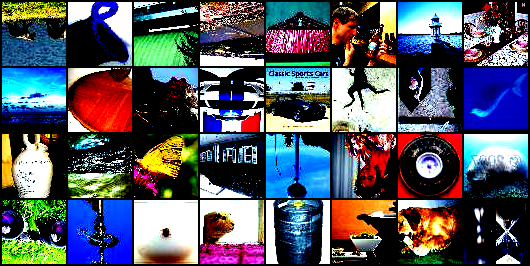

In [24]:
xb, yb = next(iter(dm.train_dataloader()))
print(xb.shape, yb.shape)
dm.show_batch(xb[:32])

[15:28:46] INFO - ResNet: init
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[15:28:46] INFO - ResNetX: init
[15:28:46] INFO - Classifier: init
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'nnet' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['nnet'])`.
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
[15:28:47] INFO - loading dataset slegroux/tiny-imagenet-200-clean with args () from split train
[15:28:47] INFO - loading dataset slegroux/tiny-imagenet-200-clean from split train
Overwrite dataset info from restored data version if exists.
[15:28:48] INFO - Overwrite dataset inf

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

LR finder stopped early after 56 steps due to diverging loss.
Learning rate set to 0.005623413251903493
Restoring states from the checkpoint path at /user/s/slegroux/Projects/nimrod/tutorials/.lr_find_eee77a9a-1684-404b-8468-2afb1727e716.ckpt
Restored all states from the checkpoint at /user/s/slegroux/Projects/nimrod/tutorials/.lr_find_eee77a9a-1684-404b-8468-2afb1727e716.ckpt


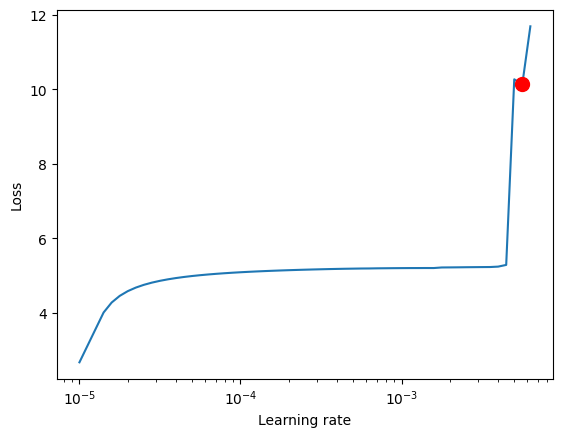

Suggested learning rate: 0.005623413251903493

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[15:29:10] INFO - ResNetX: init
[15:29:10] INFO - Classifier: init


====================================================================================================
Layer (type:depth-idx)                             Output Shape              Param #
====================================================================================================
ResNet                                             [512, 200]                --
├─Sequential: 1-1                                  [512, 200]                --
│    └─ResBlock: 2-1                               [512, 16, 64, 64]         --
│    │    └─Sequential: 3-1                        [512, 16, 64, 64]         2,736
│    │    └─Identity: 3-2                          [512, 3, 64, 64]          --
│    │    └─ConvLayer: 3-3                         [512, 16, 64, 64]         48
│    │    └─LeakyReLU: 3-4                         [512, 16, 64, 64]         --
│    └─ResBlock: 2-2                               [512, 32, 32, 32]         --
│    │    └─Sequential: 3-5                        [512, 32, 32, 32]         13,824
│    │    └─AvgPool2d: 3-6                         [512, 16, 32, 32]         --
│    │    └─ConvLayer: 3-7                         [512, 32, 32, 32]         512
│    │    └─LeakyReLU: 3-8                         [512, 32, 32, 32]         --
│    └─ResBlock: 2-3                               [512, 64, 16, 16]         --
│    │    └─Sequential: 3-9                        [512, 64, 16, 16]         55,296
│    │    └─AvgPool2d: 3-10                        [512, 32, 16, 16]         --
│    │    └─ConvLayer: 3-11                        [512, 64, 16, 16]         2,048
│    │    └─LeakyReLU: 3-12                        [512, 64, 16, 16]         --
│    └─ResBlock: 2-4                               [512, 128, 8, 8]          --
│    │    └─Sequential: 3-13                       [512, 128, 8, 8]          221,184
│    │    └─AvgPool2d: 3-14                        [512, 64, 8, 8]           --
│    │    └─ConvLayer: 3-15                        [512, 128, 8, 8]          8,192
│    │    └─LeakyReLU: 3-16                        [512, 128, 8, 8]          --
│    └─ResBlock: 2-5                               [512, 256, 4, 4]          --
│    │    └─Sequential: 3-17                       [512, 256, 4, 4]          884,736
│    │    └─AvgPool2d: 3-18                        [512, 128, 4, 4]          --
│    │    └─ConvLayer: 3-19                        [512, 256, 4, 4]          32,768
│    │    └─LeakyReLU: 3-20                        [512, 256, 4, 4]          --
│    └─ResBlock: 2-6                               [512, 128, 2, 2]          --
│    │    └─Sequential: 3-21                       [512, 128, 2, 2]          442,368
│    │    └─AvgPool2d: 3-22                        [512, 256, 2, 2]          --
│    │    └─ConvLayer: 3-23                        [512, 128, 2, 2]          32,768
│    │    └─LeakyReLU: 3-24                        [512, 128, 2, 2]          --
│    └─ResBlock: 2-7                               [512, 200, 1, 1]          --
│    │    └─Sequential: 3-25                       [512, 200, 1, 1]          590,400
│    │    └─AvgPool2d: 3-26                        [512, 128, 1, 1]          --
│    │    └─ConvLayer: 3-27                        [512, 200, 1, 1]          25,600
│    │    └─LeakyReLU: 3-28                        [512, 200, 1, 1]          --
│    └─Flatten: 2-8                                [512, 200]                --
====================================================================================================
Total params: 2,312,480
Trainable params: 2,312,480
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 68.35
====================================================================================================
Input size (MB): 25.17
Forward/backward pass size (MB): 2332.75
Params size (MB): 9.25
Estimated Total Size (MB): 2367.17
====================================================================================================

/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:654: Checkpoint directory /user/s/slegroux/Projects/nimrod/tutorials/checkpoints/Tiny-ImageNet-Classifier/ResNetX-bs:512-epochs:5 exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[15:29:11] INFO - Optimizer: <class 'torch.optim.adamw.AdamW'>
[15:29:11] INFO - Scheduler: <class 'torch.optim.lr_scheduler.OneCycleLR'>

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | nnet         | ResNet             | 2.3 M  | train
1 | loss         | CrossEntropyLoss   | 0      | train
2 | train_acc    | MulticlassAccuracy | 0      | train
3 | val_acc      | MulticlassAccuracy | 0      | train
4 | test_acc     | MulticlassAccuracy | 0      | train
5 | train_loss   | MeanMetric         | 0      | train
6 | val_loss     | MeanMetric         | 0      | train
7 | test_loss    | MeanMetric         | 0     

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/user/s/slegroux/miniconda3/envs/nimrod/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/acc          │   0.005484460853040218    │
│         test/loss         │      11730.869140625      │
└───────────────────────────┴───────────────────────────┘

[15:31:28] INFO - Best ckpt path: /user/s/slegroux/Projects/nimrod/tutorials/checkpoints/Tiny-ImageNet-Classifier/ResNetX-bs:512-epochs:5/4-11595.22.ckpt


epoch,▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▅▅▅▅▅▅▅▅▅▅▅▅▆▆▆▆█████████
lr-AdamW,▁▁▂▂▂▄▄▄▅▅█████████▇▇▆▆▆▆▅▅▅▄▄▄▂▂▂▁▁▁▁▁▁
test/acc,▁
test/loss,▁
train/acc_epoch,█▁▁▁▂
train/acc_step,▅▅▆▆█▇▆▂▂▂▁▃▅▃▄▃▇▃▂▂▃▁▂▃▅▂▁▃▂▂▄▂▂▂▄▄▂▅▁▅
train/loss_epoch,▁█▁▁▁
train/loss_step,▁▁▁▁▁▁▆█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇███
val/acc,██▂▁▆
val/acc_best,▁▁▁▁▁


'/user/s/slegroux/Projects/nimrod/tutorials/checkpoints/Tiny-ImageNet-Classifier/ResNetX-bs:512-epochs:5/4-11595.22.ckpt'

In [10]:
# SETUP

N_EPOCHS = 5
do_lr_finder = True

# exp_logger = 'tensorboard'
exp_logger = 'wandb'

cfg_model = OmegaConf.load('../config/model/image/resnetx.yaml')
cfg_model.num_classes=dm.num_classes
# feats_dim = [1, 8, 16, 32, 64]
# feats_dim = [1, 4, 8, 16, 8]
# feats_dim = [1, 16, 32, 64, 32]
# feats_dim = [3, 16, 32, 64, 128, 64]
feats_dim = [3, 16, 32, 64, 128, 256, 128]
cfg_model.nnet.n_features = feats_dim
model = instantiate(cfg_model) #partial
extra_tag = "stride 1 first"

tags = [extra_tag, f"n_features:{feats_dim}", f"bs:{dm.batch_size}", f"epochs:{N_EPOCHS}"]


# LR Finder
if do_lr_finder:
    suggested_lr = lr_finder(model, dm, plot=True)
    print(f"Suggested learning rate: {suggested_lr}")
else:
    suggested_lr = 3e-4

# ONE-CYCLE TRAINING
train_one_cycle(
    model,
    dm,
    n_epochs=N_EPOCHS,
    max_lr=suggested_lr,
    project_name=project_name,
    tags=tags,
    logger_cb=exp_logger
    )